In [79]:

import os, sys
sys.path.insert(0, '/Users/kv/workspace/kv-capstone/NBAwinshare/source')

from source import seasonalregressor
from source import data_wrangle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import pickle
from sklearn.metrics import mean_squared_error


import importlib
%matplotlib inline

advanced = data_wrangle.read_all_advanced('./data/advanced')
pergame  = data_wrangle.read_all_pergame('./data/per_game')
seasonal = data_wrangle.clean_and_join_seasonal_dataframe(advanced, pergame)
demographic = data_wrangle.read_demographic_data('./data/player_data.csv')
fullstats = data_wrangle.add_years_in_league(seasonal, demographic)

cols_to_train_from_correlation = ['WS',
 'OWS',
 'VORP',
 'DWS',
 'MP_total',
 'PS/G',
 'FG',
 'MP_pergame',
 'GS',
 'FT',
 '2P',
 'FTA',
 'FGA',
 '2PA',
 'DRB']

with open('train_test.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    trainnames, testnames = pickle.load(f)
    
actuals = data_wrangle.get_actuals_for_years_5_thru_9(fullstats, testnames)

In [12]:
from source.helper_functions import weighted_mean_multi_col_weight as wm2
from source.helper_functions import weighted_mean_one_col_weight as wm1

In [24]:
importlib.reload(seasonalregressor)

<module 'source.seasonalregressor' from '/Users/kv/workspace/kv-capstone/NBAwinshare/source/seasonalregressor.py'>

In [14]:
fulltrain, fulltest = sr3.create_train_test_split(fullstats, trainnames, testnames)

In [30]:
functions = ['default', wm1, wm2]
scores = []
allprediction_dicts = []

for function in functions:
    sr = seasonalregressor.SeasonalRegressor(columns_to_train=cols_to_train_from_correlation, function=function)
    sr = sr.fit(fulltrain)
    pred_dict = sr.predict(fulltest)
    allprediction_dicts.append(pred_dict)
    predictions = sr.unpack_prediction_dictionary(pred_dict)
    score = mean_squared_error(actuals, predictions)
    scores.append(score)


Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 5}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 5
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 6}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 6
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 7}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 7
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 8}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'P

Predicting year: 9 for player:  Spencer Hawes
Predicting year: 9 for player:  Stephon Marbury
Predicting year: 9 for player:  Jason Williams
Predicting year: 9 for player:  Antawn Jamison
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 5}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 5
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 6}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 6
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 7}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for y

Predicting year: 9 for player:  Kris Humphries
Predicting year: 9 for player:  Cuttino Mobley
Predicting year: 9 for player:  Mike Dunleavy
Predicting year: 9 for player:  Tony Battie
Predicting year: 9 for player:  Jared Jeffries
Predicting year: 9 for player:  Steve Nash
Predicting year: 9 for player:  Spencer Hawes
Predicting year: 9 for player:  Stephon Marbury
Predicting year: 9 for player:  Jason Williams
Predicting year: 9 for player:  Antawn Jamison
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 5}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 5
Number of players:  275  with full season data for seasons: {1, 2, 3, 4, 6}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for 

Predicting year: 9 for player:  Tyronn Lue
Predicting year: 9 for player:  Brook Lopez
Predicting year: 9 for player:  Raef LaFrentz
Predicting year: 9 for player:  Kirk Hinrich
Predicting year: 9 for player:  Bruce Bowen
Predicting year: 9 for player:  Erick Strickland
Predicting year: 9 for player:  Kris Humphries
Predicting year: 9 for player:  Cuttino Mobley
Predicting year: 9 for player:  Mike Dunleavy
Predicting year: 9 for player:  Tony Battie
Predicting year: 9 for player:  Jared Jeffries
Predicting year: 9 for player:  Steve Nash
Predicting year: 9 for player:  Spencer Hawes
Predicting year: 9 for player:  Stephon Marbury
Predicting year: 9 for player:  Jason Williams
Predicting year: 9 for player:  Antawn Jamison


In [31]:
scores

[9.222733341935486, 8.85425506451613, 8.69500149032258]

In [32]:
average_off = np.sqrt(scores)

In [33]:
average_off

array([3.03689535, 2.97561003, 2.94872879])

The average predicted score error is more than the mean of all player-seasons for Win Shares. On the plus-side, at least the error is about the same as the standard deviation.

In [22]:
fullstats.describe()['WS']

count    10116.000000
mean         2.644494
std          3.007411
min         -2.100000
25%          0.300000
50%          1.700000
75%          4.100000
max         20.300000
Name: WS, dtype: float64

In [51]:
importlib.reload(seasonalregressor)

<module 'source.seasonalregressor' from '/Users/kv/workspace/kv-capstone/NBAwinshare/source/seasonalregressor.py'>

In [52]:
sr = seasonalregressor.SeasonalRegressor(columns_to_train=cols_to_train_from_correlation, function=function)

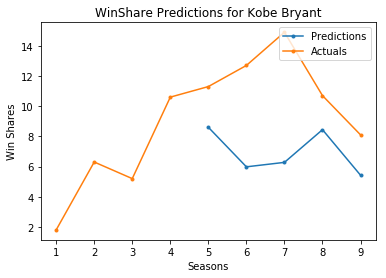

In [53]:
sr.plot_player_arc(fullstats,'Kobe Bryant',allprediction_dicts[2])

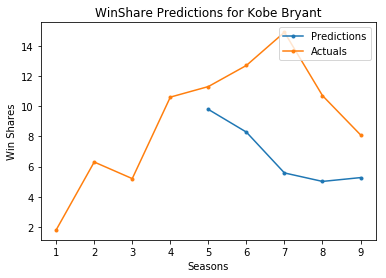

In [66]:
sr.plot_player_arc(fullstats,'Kobe Bryant',allprediction_dicts[0])

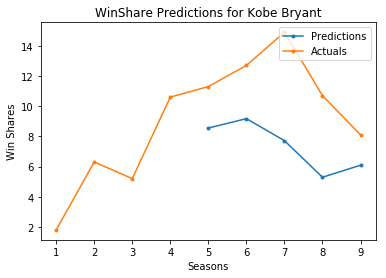

In [67]:
sr.plot_player_arc(fullstats,'Kobe Bryant',allprediction_dicts[1])

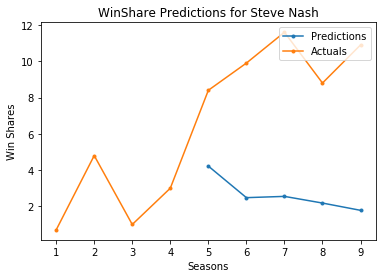

In [54]:
sr.plot_player_arc(fullstats,'Steve Nash',allprediction_dicts[2])

In [55]:
allprediction_dicts[2].keys()

dict_keys(['Francisco Garcia', 'Shannon Brown', 'Vitaly Potapenko', 'Goran Dragic', 'Jake Voskuhl', 'Earl Boykins', 'Kobe Bryant', 'Shawn Marion', 'Andrea Bargnani', 'Robin Lopez', 'Sasha Pavlovic', 'Dwyane Wade', 'Brian Cook', 'Rasual Butler', 'Andris Biedrins', 'Tyronn Lue', 'Brook Lopez', 'Raef LaFrentz', 'Kirk Hinrich', 'Bruce Bowen', 'Erick Strickland', 'Kris Humphries', 'Cuttino Mobley', 'Mike Dunleavy', 'Tony Battie', 'Jared Jeffries', 'Steve Nash', 'Spencer Hawes', 'Stephon Marbury', 'Jason Williams', 'Antawn Jamison'])

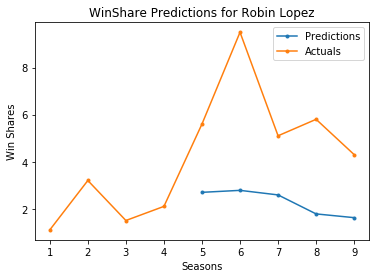

In [56]:
sr.plot_player_arc(fullstats,'Robin Lopez',allprediction_dicts[2])

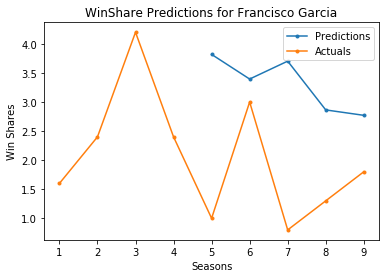

In [57]:
sr.plot_player_arc(fullstats,'Francisco Garcia',allprediction_dicts[2])

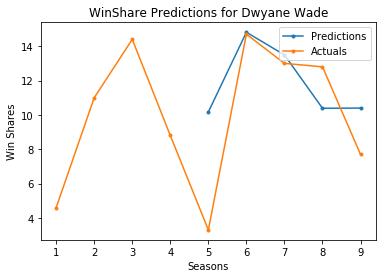

In [58]:
sr.plot_player_arc(fullstats,'Dwyane Wade',allprediction_dicts[2])

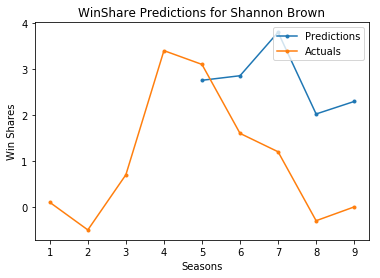

In [59]:
sr.plot_player_arc(fullstats,'Shannon Brown',allprediction_dicts[2])

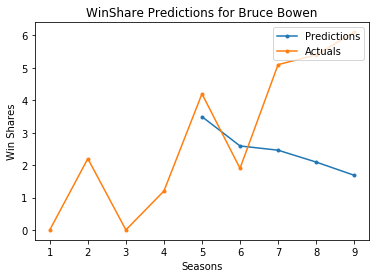

In [60]:
sr.plot_player_arc(fullstats,'Bruce Bowen',allprediction_dicts[2])

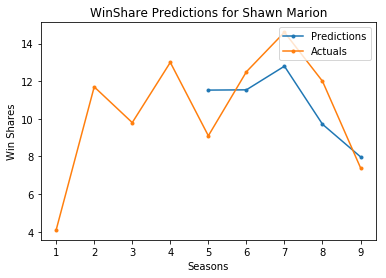

In [61]:
sr.plot_player_arc(fullstats,'Shawn Marion',allprediction_dicts[2])

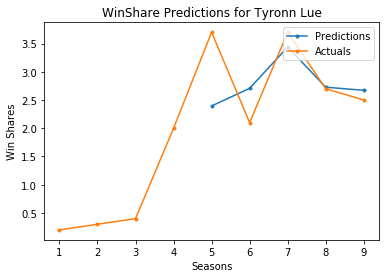

In [65]:
sr.plot_player_arc(fullstats,'Tyronn Lue',allprediction_dicts[2])

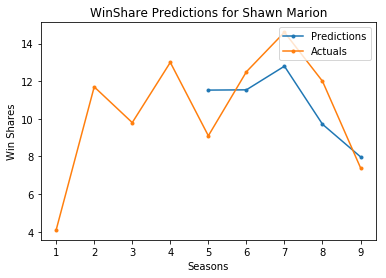

In [68]:
sr.plot_player_arc(fullstats,'Shawn Marion',allprediction_dicts[2])

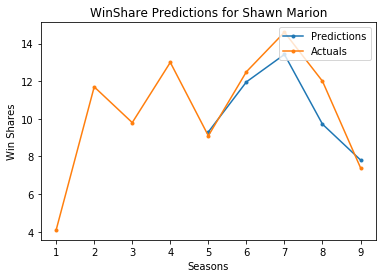

In [69]:
sr.plot_player_arc(fullstats,'Shawn Marion',allprediction_dicts[1])

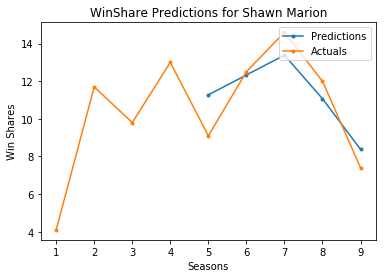

In [70]:
sr.plot_player_arc(fullstats,'Shawn Marion',allprediction_dicts[0])

Let's see what happens if we exclude LBJ in the training set

In [72]:
lebronlesstrain = fulltrain[fulltrain['Player']!= 'LeBron James']

In [75]:
functions = ['default', wm1, wm2]
scores = []
allprediction_dicts = []

for function in functions:
    sr = seasonalregressor.SeasonalRegressor(columns_to_train=cols_to_train_from_correlation, function=function)
    sr = sr.fit(lebronlesstrain)
    pred_dict = sr.predict(fulltest)
    allprediction_dicts.append(pred_dict)
    predictions = sr.unpack_prediction_dictionary(pred_dict)
    score = mean_squared_error(actuals, predictions)
    scores.append(score)

Number of players:  274  with full season data for seasons: {1, 2, 3, 4, 5}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 5
Number of players:  274  with full season data for seasons: {1, 2, 3, 4, 6}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 6
Number of players:  274  with full season data for seasons: {1, 2, 3, 4, 7}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 7
Number of players:  274  with full season data for seasons: {1, 2, 3, 4, 8}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'P

Predicting year: 9 for player:  Steve Nash
Predicting year: 9 for player:  Spencer Hawes
Predicting year: 9 for player:  Stephon Marbury
Predicting year: 9 for player:  Jason Williams
Predicting year: 9 for player:  Antawn Jamison
Number of players:  274  with full season data for seasons: {1, 2, 3, 4, 5}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 5
Number of players:  274  with full season data for seasons: {1, 2, 3, 4, 6}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 6
Number of players:  274  with full season data for seasons: {1, 2, 3, 4, 7}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P'

Predicting year: 9 for player:  Kris Humphries
Predicting year: 9 for player:  Cuttino Mobley
Predicting year: 9 for player:  Mike Dunleavy
Predicting year: 9 for player:  Tony Battie
Predicting year: 9 for player:  Jared Jeffries
Predicting year: 9 for player:  Steve Nash
Predicting year: 9 for player:  Spencer Hawes
Predicting year: 9 for player:  Stephon Marbury
Predicting year: 9 for player:  Jason Williams
Predicting year: 9 for player:  Antawn Jamison
Number of players:  274  with full season data for seasons: {1, 2, 3, 4, 5}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 5
Number of players:  274  with full season data for seasons: {1, 2, 3, 4, 6}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for 

Predicting year: 9 for player:  Tyronn Lue
Predicting year: 9 for player:  Brook Lopez
Predicting year: 9 for player:  Raef LaFrentz
Predicting year: 9 for player:  Kirk Hinrich
Predicting year: 9 for player:  Bruce Bowen
Predicting year: 9 for player:  Erick Strickland
Predicting year: 9 for player:  Kris Humphries
Predicting year: 9 for player:  Cuttino Mobley
Predicting year: 9 for player:  Mike Dunleavy
Predicting year: 9 for player:  Tony Battie
Predicting year: 9 for player:  Jared Jeffries
Predicting year: 9 for player:  Steve Nash
Predicting year: 9 for player:  Spencer Hawes
Predicting year: 9 for player:  Stephon Marbury
Predicting year: 9 for player:  Jason Williams
Predicting year: 9 for player:  Antawn Jamison


Slightly better scores without LBJ

In [78]:
scores

[8.877875825806452, 8.746958432258065, 8.663819967741937]

In [83]:
fullstats[(fullstats['Player']=='Andrew Wiggins') & (fullstats['Seasons_number'] <= 4)]

,Player,Pos,Age,Tm,G,MP_total,PER,TS%,3PAr,FTr,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G,Seasons_number
480,Andrew Wiggins,SF,19,MIN,82,2969,13.9,0.517,0.111,0.410,...,1.6,2.9,4.6,2.1,1.0,0.6,2.2,2.3,16.9,1
481,Andrew Wiggins,SF,20,MIN,81,2845,16.5,0.543,0.147,0.437,...,1.3,2.3,3.6,2.0,1.0,0.6,2.2,2.0,20.7,2
482,Andrew Wiggins,SF,21,MIN,82,3048,16.5,0.534,0.184,0.345,...,1.2,2.8,4.0,2.3,1.0,0.4,2.3,2.2,23.6,3
483,Andrew Wiggins,SF,22,MIN,82,2979,13.0,0.505,0.260,0.242,...,1.0,3.4,4.4,2.0,1.1,0.6,1.7,2.0,17.7,4


In [89]:
importlib.reload(seasonalregressor)

<module 'source.seasonalregressor' from '/Users/kv/workspace/kv-capstone/NBAwinshare/source/seasonalregressor.py'>

In [90]:
sr = seasonalregressor.SeasonalRegressor(columns_to_train=cols_to_train_from_correlation, function=function)
sr = sr.fit(lebronlesstrain)

Number of players:  274  with full season data for seasons: {1, 2, 3, 4, 5}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 5
Number of players:  274  with full season data for seasons: {1, 2, 3, 4, 6}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 6
Number of players:  274  with full season data for seasons: {1, 2, 3, 4, 7}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 7
Number of players:  274  with full season data for seasons: {1, 2, 3, 4, 8}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'P

In [91]:
wiggins = sr.get_single_player_first_x_full_years(fullstats,'Andrew Wiggins')

In [98]:
wiggins_dict = sr.predict(wiggins)

Predicting year: 5 for player:  Andrew Wiggins
Predicting year: 6 for player:  Andrew Wiggins
Predicting year: 7 for player:  Andrew Wiggins
Predicting year: 8 for player:  Andrew Wiggins
Predicting year: 9 for player:  Andrew Wiggins


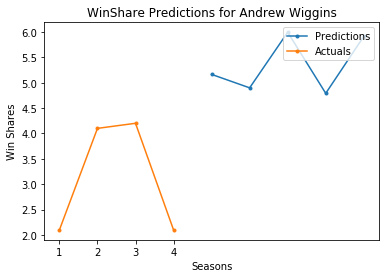

In [99]:
sr.plot_player_arc(fullstats,'Andrew Wiggins',wiggins_dict)